In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

import statsmodels.api as sm

https://www.statbureau.org/ru/russia/cpi

In [2]:
ipc = pd.read_csv('cpi.csv', index_col=0,encoding='utf-8')

In [3]:
ipc.iloc[0, :8] = np.nan
ipc

,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
Год,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.21,100.57,100.56,100.51
2014,100.59,100.70,101.02,100.90,100.90,100.62,100.49,100.24,100.65,100.82,101.28,102.62
2015,103.85,102.22,101.21,100.46,100.35,100.19,100.80,100.35,100.57,100.74,100.75,100.77
2016,100.96,100.63,100.46,100.44,100.41,100.36,100.54,100.01,100.17,100.43,100.44,100.40
2017,100.62,100.22,100.13,100.33,100.37,100.61,100.07,99.46,99.85,100.20,100.22,100.42
2018,100.31,100.21,100.29,100.38,100.38,100.49,100.27,100.01,100.16,100.35,100.50,100.84
2019,101.01,100.44,100.32,100.29,100.34,100.04,100.20,99.76,99.84,100.13,100.28,100.36
2020,100.40,100.33,100.55,100.83,100.27,100.22,100.35,99.96,99.93,100.43,100.71,100.83
2021,100.67,100.78,100.66,100.58,100.74,100.69,100.31,100.17,100.60,101.11,100.96,100.82


In [4]:
ipc_stacked = ipc.stack()
ipc_stacked

Год            
2013   Сентябрь    100.21
       Октябрь     100.57
       Ноябрь      100.56
       Декабрь     100.51
2014   Январь      100.59
                    ...  
2022   Январь      100.99
       Февраль     101.17
       Март        107.61
       Апрель      101.56
       Май         100.12
Length: 105, dtype: float64

https://cbr.ru/hd_base/infl/?UniDbQuery.Posted=True&UniDbQuery.From=17.09.2013&UniDbQuery.To=15.06.2022

In [5]:
key_and_inflat = pd.read_csv('inflat_and_keyrate.csv', sep=';',
            usecols=[0, 1, 2], dtype={'Дата': np.object_}, decimal=',').set_index('Дата')
key_and_inflat['ИПЦ, % к предыд. мес.'] = ipc_stacked.values[::-1]

In [6]:
key_and_inflat = key_and_inflat[::-1]

In [7]:
key_and_inflat

,"Ключевая ставка, % годовых","Инфляция, % г/г","ИПЦ, % к предыд. мес."
Дата,,,
09.2013,5.5,6.14,100.21
10.2013,5.5,6.27,100.57
11.2013,5.5,6.50,100.56
12.2013,5.5,6.47,100.51
01.2014,5.5,6.07,100.59
...,...,...,...
01.2022,8.5,8.73,100.99
02.2022,20.0,9.15,101.17
03.2022,20.0,16.69,107.61


In [9]:
lst = list(key_and_inflat['ИПЦ, % к предыд. мес.'].values)
lst.insert(0, 1)
for i in range(1, len(lst)):
    lst[i] = round(lst[i] * lst[i-1] / 100, 4)
lst

[1,
 1.0021,
 1.0078,
 1.0134,
 1.0186,
 1.0246,
 1.0318,
 1.0423,
 1.0517,
 1.0612,
 1.0678,
 1.073,
 1.0756,
 1.0826,
 1.0915,
 1.1055,
 1.1345,
 1.1782,
 1.2044,
 1.219,
 1.2246,
 1.2289,
 1.2312,
 1.241,
 1.2453,
 1.2524,
 1.2617,
 1.2712,
 1.281,
 1.2933,
 1.3014,
 1.3074,
 1.3132,
 1.3186,
 1.3233,
 1.3304,
 1.3305,
 1.3328,
 1.3385,
 1.3444,
 1.3498,
 1.3582,
 1.3612,
 1.363,
 1.3675,
 1.3726,
 1.381,
 1.382,
 1.3745,
 1.3724,
 1.3751,
 1.3781,
 1.3839,
 1.3882,
 1.3911,
 1.3951,
 1.4004,
 1.4057,
 1.4126,
 1.4164,
 1.4165,
 1.4188,
 1.4238,
 1.4309,
 1.4429,
 1.4575,
 1.4639,
 1.4686,
 1.4729,
 1.4779,
 1.4785,
 1.4815,
 1.4779,
 1.4755,
 1.4774,
 1.4815,
 1.4868,
 1.4927,
 1.4976,
 1.5058,
 1.5183,
 1.5224,
 1.5257,
 1.531,
 1.5304,
 1.5293,
 1.5359,
 1.5468,
 1.5596,
 1.57,
 1.5822,
 1.5926,
 1.6018,
 1.6137,
 1.6248,
 1.6298,
 1.6326,
 1.6424,
 1.6606,
 1.6765,
 1.6902,
 1.7069,
 1.7269,
 1.8583,
 1.8873,
 1.8896]

In [10]:
key_and_inflat['ИПЦ_real'] = lst[1:]
key_and_inflat

,"Ключевая ставка, % годовых","Инфляция, % г/г","ИПЦ, % к предыд. мес.",ИПЦ_real
Дата,,,,
09.2013,5.5,6.14,100.21,1.0021
10.2013,5.5,6.27,100.57,1.0078
11.2013,5.5,6.50,100.56,1.0134
12.2013,5.5,6.47,100.51,1.0186
01.2014,5.5,6.07,100.59,1.0246
...,...,...,...,...
01.2022,8.5,8.73,100.99,1.7069
02.2022,20.0,9.15,101.17,1.7269
03.2022,20.0,16.69,107.61,1.8583


In [31]:
# key_and_inflat['ИПЦ_normed'] = key_and_inflat['ИПЦ, % к предыд. мес.'] / key_and_inflat['ИПЦ, % к предыд. мес.'].iloc[0] #* 100
# key_and_inflat['ИПЦ, % к предыд. мес.'].shift(1, fill_value=100)
# key_and_inflat['ИПЦ_normed'] = key_and_inflat['ИПЦ, % к предыд. мес.'].copy()
# key_and_inflat['ИПЦ_normed'].iloc[0] = 1
# key_and_inflat['ИПЦ_shifted'] = key_and_inflat['ИПЦ_normed'].shift(1, fill_value=1)
# key_and_inflat['ИПЦ_real'] = key_and_inflat['ИПЦ_normed'] * key_and_inflat['ИПЦ_shifted'] / 100
# key_and_inflat

,"Ключевая ставка, % годовых","Инфляция, % г/г","ИПЦ, % к предыд. мес.",ИПЦ_normed,ИПЦ_shifted,ИПЦ_real
Дата,,,,,,
09.2013,5.5,6.14,100.21,1.00,1.00,0.010000
10.2013,5.5,6.27,100.57,100.57,1.00,1.005700
11.2013,5.5,6.50,100.56,100.56,100.57,101.133192
12.2013,5.5,6.47,100.51,100.51,100.56,101.072856
01.2014,5.5,6.07,100.59,100.59,100.51,101.103009
...,...,...,...,...,...,...
01.2022,8.5,8.73,100.99,100.99,100.82,101.818118
02.2022,20.0,9.15,101.17,101.17,100.99,102.171583
03.2022,20.0,16.69,107.61,107.61,101.17,108.869037


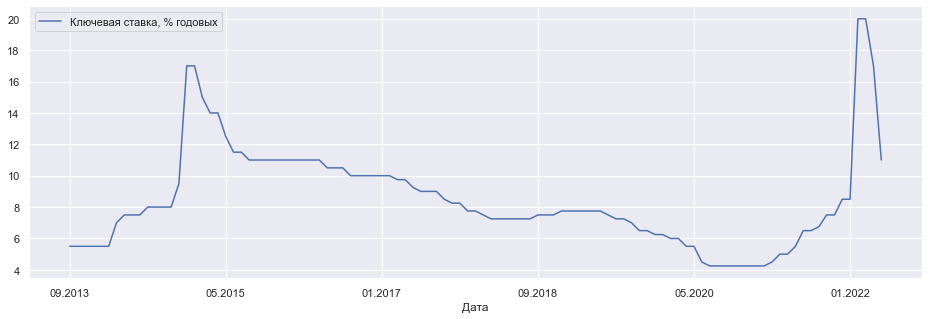

In [11]:
key_and_inflat[['Ключевая ставка, % годовых']].plot(figsize=(16, 5))
plt.show()

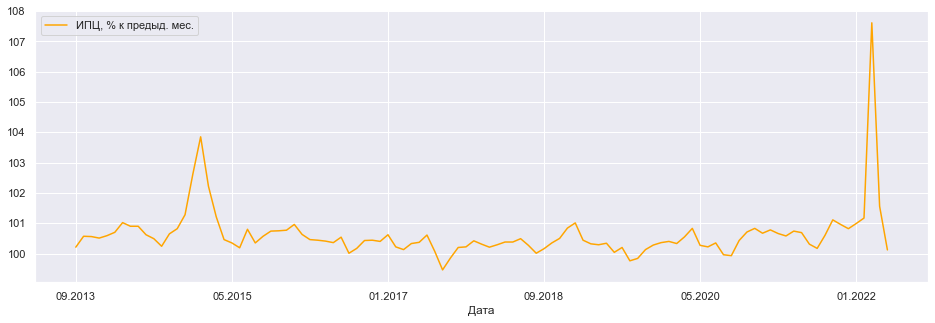

In [12]:
key_and_inflat[['ИПЦ, % к предыд. мес.']].plot(figsize=(16, 5), color='orange')
plt.show() 

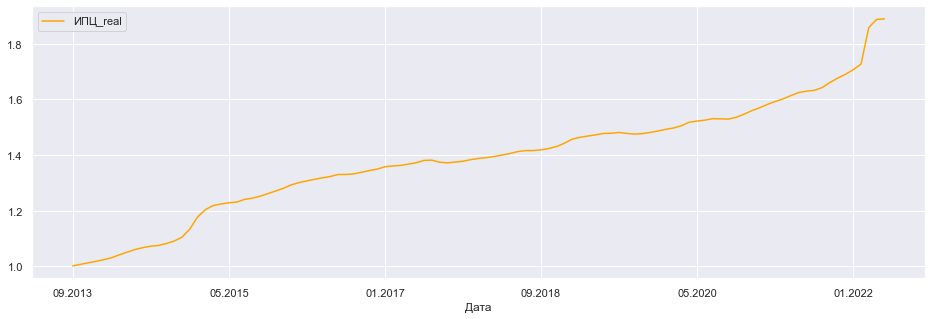

In [13]:
key_and_inflat[['ИПЦ_real']].plot(figsize=(16, 5), color='orange')
plt.show() 

In [14]:
credit_vols = pd.read_csv('credit_vol_10_2020.csv', sep=';', decimal=',').T
credit_vols.rename(columns={0: 'Объемы кредитов, млрд. руб.'}, inplace=True)
credit_vols.dropna(inplace=True)
credit_vols.index = list(map(lambda x: x.split('.')[1] + '.20' + x.split('.')[-1], credit_vols.index))
credit_vols

,"Объемы кредитов, млрд. руб."
09.2013,26743.91363
10.2013,27255.63844
11.2013,27699.14981
12.2013,28111.67479
01.2014,28307.11766
...,...
06.2020,46427.31322
07.2020,46694.33714
08.2020,47202.61174
09.2020,47790.49573


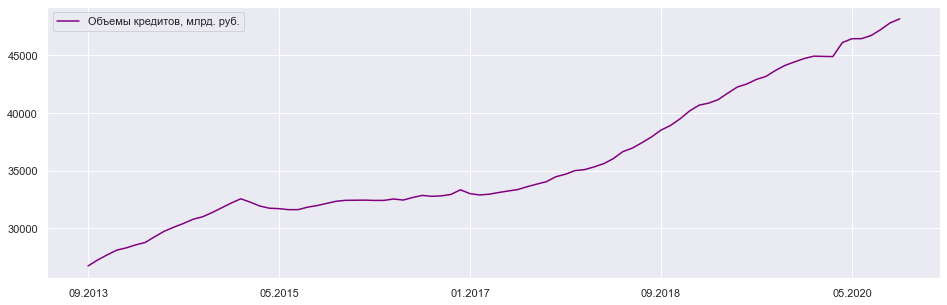

In [15]:
credit_vols.plot(figsize=(16, 5), color='purple')
plt.show() 

In [16]:
key_inflat_volumes = key_and_inflat.join(credit_vols, how='inner')
key_inflat_volumes['Объемы кредитов, трлн. руб.'] = key_inflat_volumes['Объемы кредитов, млрд. руб.'] / 1e3
key_inflat_volumes = key_inflat_volumes[['Ключевая ставка, % годовых', 'ИПЦ_real', 'Объемы кредитов, трлн. руб.']]
key_inflat_volumes

,"Ключевая ставка, % годовых",ИПЦ_real,"Объемы кредитов, трлн. руб."
09.2013,5.50,1.0021,26.743914
10.2013,5.50,1.0078,27.255638
11.2013,5.50,1.0134,27.699150
12.2013,5.50,1.0186,28.111675
01.2014,5.50,1.0246,28.307118
...,...,...,...
06.2020,4.50,1.5257,46.427313
07.2020,4.25,1.5310,46.694337
08.2020,4.25,1.5304,47.202612
09.2020,4.25,1.5293,47.790496


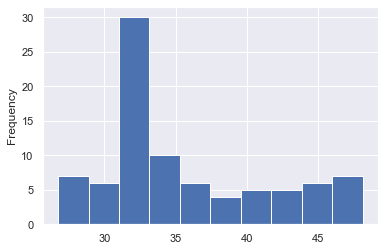

In [17]:
key_inflat_volumes['Объемы кредитов, трлн. руб.'].plot(kind='hist')
plt.show()

In [47]:
# key_inflat_volumes = key_inflat_volumes[key_inflat_volumes['ИПЦ, % к предыд. мес.'] < 102]
# key_inflat_volumes = key_inflat_volumes[(key_inflat_volumes['Объемы кредитов, трлн. руб.'] <= 45) & 
#                                         (key_inflat_volumes['ИПЦ, % к предыд. мес.'] < 102)]

In [142]:
# np.vstack(((key_inflat_volumes['ИПЦ_real']).values, (key_inflat_volumes['ИПЦ_real'] ** 2).values)).reshape((86, 2))

In [24]:
X1 = key_inflat_volumes['ИПЦ_real'].values
# X1 = np.vstack(((key_inflat_volumes['ИПЦ_real']).values, 
#                 (key_inflat_volumes['ИПЦ_real'] ** 2).values)).reshape((86, 2)) #(key_inflat_volumes['ИПЦ_real'] ** 2).values 
Y1 = key_inflat_volumes['Объемы кредитов, трлн. руб.'].values
X2 = key_inflat_volumes['Ключевая ставка, % годовых'].values

In [126]:
# model = np.poly1d(np.polyfit(X1, Y1, 2))

# polyline = np.linspace(0.98, 1.6, 50)
# plt.scatter(X1, Y1)
# plt.plot(polyline, model(polyline), c='r')
# plt.show()

In [25]:
def fit_OLS(X, Y, factor, target, return_resid=True):
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    print('Параметры регресии:', results.params)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 1], Y, label='True')
    max_x = X[:, 1].max()
    min_x = X[:, 1].min()
    x = np.linspace(min_x, max_x, 40)
    y = results.params[0] + results.params[1] * x
    plt.plot(x, y, 'r', label='OLS model')
    plt.title(f'Результаты регрессии {target} на {factor}', fontsize=14)
    plt.xlabel(f'{factor}.', fontsize=11)
    plt.ylabel(f'{target}', fontsize=11)
    plt.legend()
    plt.show()
    
    if return_resid:
        Y_res = results.resid # + results.params[0]
        return Y_res

Параметры регресии: [-6.62601021 32.00871702]


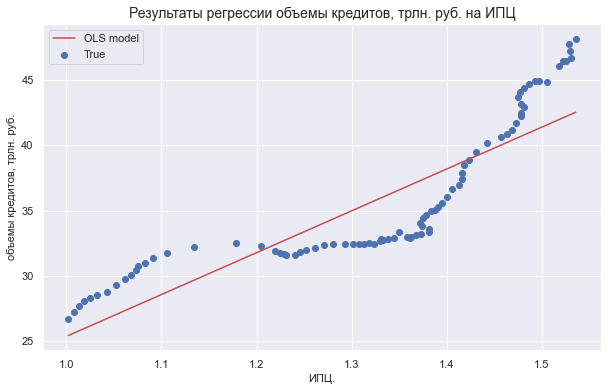

In [26]:
Y2 = fit_OLS(X1, Y1, 'ИПЦ', 'объемы кредитов, трлн. руб.')

In [27]:
Y2

array([ 1.29398852,  1.62326364,  1.88752619,  2.13360585,  2.13699641,
        2.16970622,  2.04497677,  2.24749899,  2.41471812,  2.55421805,
        2.70578829,  2.98477451,  2.97583967,  3.05701432,  3.02093182,
        2.50399936,  1.47237442,  0.34042064, -0.46301361, -0.82983047,
       -1.00432536, -1.16455982, -1.47510226, -1.40037341, -1.48701079,
       -1.59855631, -1.71601704, -1.94914705, -2.33573395, -2.58608197,
       -2.80468713, -2.98604055, -3.03773065, -3.28241413, -3.28762972,
       -3.10973222, -3.26163656, -3.40497943, -3.47123154, -3.24054032,
       -3.84129185, -4.05399655, -4.04575266, -4.04386662, -4.07409362,
       -4.22033697, -4.00208233, -3.53854947, -3.26272119, -2.91761894,
       -2.7979963 , -2.66923759, -2.72358623, -2.58091116, -2.4298994 ,
       -2.1676917 , -1.72926737, -1.64153581, -1.29901859, -0.80533192,
       -0.28006786, -0.03838378,  0.30751269,  0.60720907,  0.64301544,
        0.61330523,  0.7687318 ,  1.19138104,  1.5603504 ,  1.80

In [37]:
print(list(filter(lambda x: x[1] == 8.5, zip(Y2, X2))))
cur_level = list(filter(lambda x: x[1] == 8.5, zip(Y2, X2)))[0][0]

[(-3.2627211857519924, 8.5)]


In [38]:
Y2 = Y2 + 58.01785506499999 - cur_level

array([62.57456477, 62.90383989, 63.16810245, 63.4141821 , 63.41757266,
       63.45028247, 63.32555302, 63.52807524, 63.69529437, 63.8347943 ,
       63.98636454, 64.26535076, 64.25641592, 64.33759057, 64.30150807,
       63.78457561, 62.75295067, 61.62099689, 60.81756264, 60.45074578,
       60.27625089, 60.11601643, 59.80547399, 59.88020284, 59.79356546,
       59.68201994, 59.56455921, 59.3314292 , 58.9448423 , 58.69449428,
       58.47588912, 58.2945357 , 58.2428456 , 57.99816212, 57.99294653,
       58.17084403, 58.01893969, 57.87559682, 57.80934471, 58.04003593,
       57.4392844 , 57.22657971, 57.23482359, 57.23670963, 57.20648263,
       57.06023928, 57.27849392, 57.74202678, 58.01785506, 58.36295731,
       58.48257995, 58.61133866, 58.55699002, 58.69966509, 58.85067685,
       59.11288455, 59.55130888, 59.63904044, 59.98155766, 60.47524433,
       61.0005084 , 61.24219247, 61.58808894, 61.88778533, 61.92359169,
       61.89388148, 62.04930805, 62.47195729, 62.84092665, 63.08

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [22]:
Y2, X2 = zip(*list(filter(lambda x: x[0] > -3 and x[0] < 4, list(zip(Y2, X2)))))

Параметры регресии: [ 2.81443528 -0.27377677]


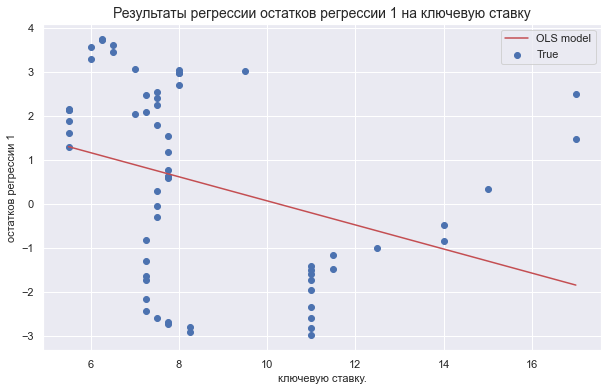

In [23]:
fit_OLS(X2, Y2, 'ключевую ставку', 'остатков регрессии 1', False)

Параметры регресии: [ 4.67511319 -0.54832558]


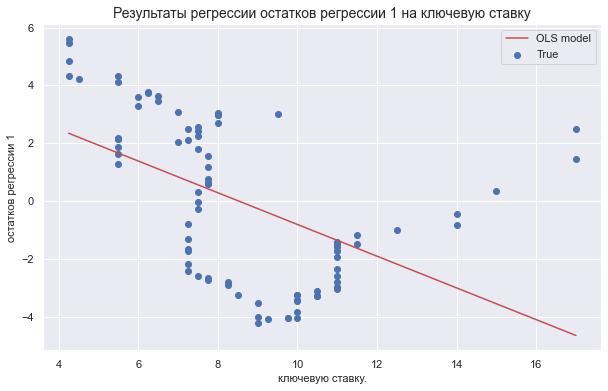

In [122]:
fit_OLS(X2, Y2, 'ключевую ставку', 'остатков регрессии 1', False)

In [269]:
X2 = sm.add_constant(X2)
model = sm.OLS(Y2, X2)
results = model.fit()

In [208]:
results.params

array([42.43641696, -0.26528495])

In [209]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.712
Date:                Wed, 15 Jun 2022   Prob (F-statistic):              0.194
Time:                        18:27:32   Log-Likelihood:                -258.57
No. Observations:                  86   AIC:                             521.1
Df Residuals:                      84   BIC:                             526.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.4364      1.809     23.455      0.000      38.839      46.034
x1            -0.2653      0.203     -1.308      0.194      -0.668       0.138
==============================================================================
Omnibus:                       12.432   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                3.756
Skew:                           0.042   Prob(JB):                        0.153
Kurtosis:                       1.980   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

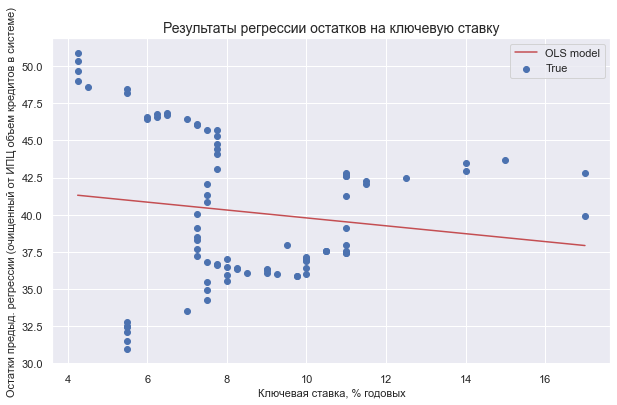

In [210]:
plt.figure(figsize=(10, 6))
plt.scatter(X2[:, 1], Y2, label='True')
max_x = X2[:, 1].max()
min_x = X2[:, 1].min()
x = np.linspace(min_x, max_x, 40)
y = results.params[0] + results.params[1] * x
plt.plot(x, y, 'r', label='OLS model')
plt.title('Результаты регрессии остатков на ключевую ставку', fontsize=14)
plt.xlabel('Ключевая ставка, % годовых', fontsize=11)
plt.ylabel('Остатки предыд. регрессии (очищенный от ИПЦ объем кредитов в системе)', fontsize=11)
plt.legend()
plt.show()

In [43]:
key_inflat_volumes

,"Ключевая ставка, % годовых","Инфляция, % г/г","ИПЦ, % к предыд. мес.","Объемы кредитов, млрд. руб.","Объемы кредитов, трлн. руб."
09.2013,5.50,6.14,100.21,26743.91363,26.743914
10.2013,5.50,6.27,100.57,27255.63844,27.255638
11.2013,5.50,6.50,100.56,27699.14981,27.699150
12.2013,5.50,6.47,100.51,28111.67479,28.111675
01.2014,5.50,6.07,100.59,28307.11766,28.307118
...,...,...,...,...,...
11.2019,6.50,3.50,100.28,44416.75737,44.416757
12.2019,6.25,3.00,100.36,44705.08519,44.705085
01.2020,6.25,2.40,100.40,44911.86290,44.911863
02.2020,6.00,2.30,100.33,44892.39034,44.892390


In [34]:
from sklearn.linear_model import LinearRegression

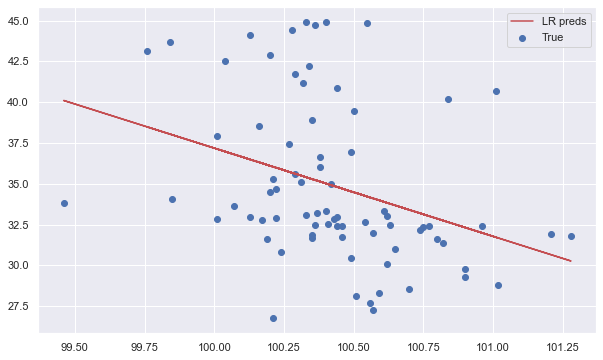

In [39]:
lr = LinearRegression()
lr.fit(X1.reshape(-1, 1), Y1)
y_pred1 = lr.predict(X1.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X1, Y1, label='True')
plt.plot(X1, y_pred1, c='r', label='LR preds')
plt.legend()
plt.show()

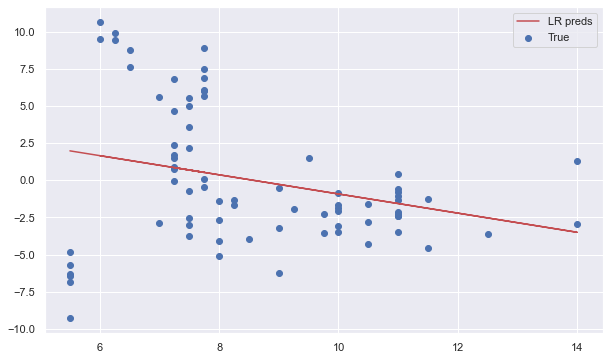

In [42]:
Y2 = Y1 - y_pred1
lr.fit(X2.reshape(-1, 1), Y2)
y_pred2 = lr.predict(X2.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X2, Y2, label='True')
plt.plot(X2, y_pred2, c='r', label='LR preds')
plt.legend()
plt.show()